In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.pyplot import cm
import scipy.stats as scs 
#import statsmodels.api as sm

%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost import XGBRegressor

In [6]:
#read the pre-processed dataset 
df_house = pd.read_csv('melb_data_new.csv')

In [5]:
#df_house['Date'] = pd.to_datetime(df_house['Date'])
#df_house['Month'] = df_house['Date'].dt.month
#df_house['Year'] = df_house['Date'].dt.year

In [8]:
df_house['Date'] = pd.to_datetime(df_house['Date'])

In [9]:
df_house['DateNum'] = df_house.Date.apply(lambda x: pd.to_datetime(x).strftime('%Y%m%d'))

In [10]:
df_house.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea1,Lattitude,Longtitude,Regionname,Propertycount,DateNum
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,2,1,1,202,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,20160312
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,2,1,1,156,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,20160402


In [11]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  int64         
 13  Landsize       13580 non-null  int64         
 14  CouncilArea1   13580 non-null  object        
 15  Lattitude      1358

In [12]:
df_house['DateNum'] = df_house['DateNum'].astype(str).astype(int)

In [13]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  int64         
 13  Landsize       13580 non-null  int64         
 14  CouncilArea1   13580 non-null  object        
 15  Lattitude      1358

In [14]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,8.500000e+04,6.500000e+05,9.030000e+05,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.000000e+00,6.100000e+00,9.200000e+00,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3.000000e+03,3.044000e+03,3.084000e+03,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00
Car,13580.0,1.713402e+00,0.859637,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.000000e+00,1.770000e+02,4.400000e+02,6.510000e+02,4.330140e+05
Lattitude,13580.0,-3.780920e+01,0.079260,-3.818255e+01,-3.785682e+01,-3.780235e+01,-3.775640e+01,-3.740853e+01
Longtitude,13580.0,1.449952e+02,0.103916,1.444318e+02,1.449296e+02,1.450001e+02,1.450583e+02,1.455264e+02


<AxesSubplot:xlabel='Price', ylabel='Count'>

Text(0.5, 1.0, 'distribution of property prices in Melbourne')

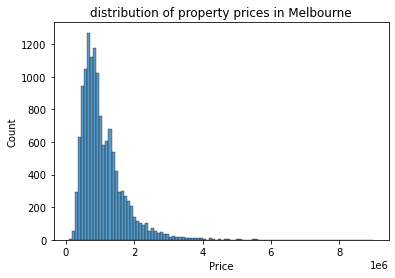

In [15]:
# Price distributions for all properties in Melbourne

#fig, axs = plt.subplots(figsize=(12,8))
sns.histplot(df_house['Price'],bins = 100)
plt.title("distribution of property prices in Melbourne")

### OUTLIER

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Price'>

Text(0, 0.5, 'Counts')

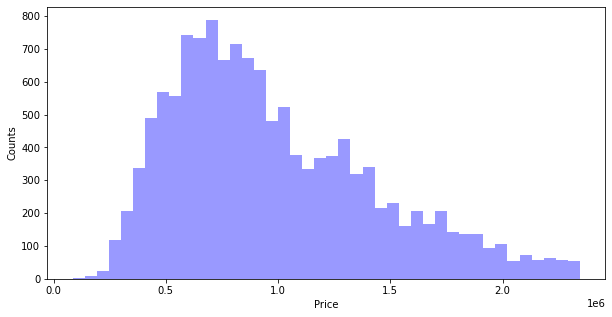

In [16]:
priceQ1 = df_house['Price'].quantile(0.25)
priceQ3 = df_house['Price'].quantile(0.75)
priceIQR = priceQ3-priceQ1
price_Lower_Whisker = priceQ1 - 1.5*priceIQR
price_Upper_Whisker = priceQ3 + 1.5*priceIQR
df_house = df_house[(df_house['Price']>price_Lower_Whisker)&(df_house['Price']<price_Upper_Whisker)]
plt.figure(figsize=(10,5))
sns.distplot(df_house['Price'],hist=True, kde=False, color='blue')
plt.ylabel('Counts')

In [17]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,12956.0,2.884455e+00,0.927808,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+01
Price,12956.0,9.813593e+05,452925.148384,8.500000e+04,6.370000e+05,8.800000e+05,1.270000e+06,2.345000e+06
Distance,12956.0,1.024186e+01,5.945047,0.000000e+00,6.200000e+00,9.400000e+00,1.300000e+01,4.810000e+01
Postcode,12956.0,3.103913e+03,92.079365,3.000000e+03,3.044000e+03,3.081000e+03,3.147000e+03,3.977000e+03
Bedroom2,12956.0,2.862998e+00,0.939786,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+01
Bathroom,12956.0,1.486338e+00,0.639047,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00
Car,12956.0,1.686169e+00,0.841603,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01
Landsize,12956.0,5.171153e+02,1498.205505,0.000000e+00,1.680000e+02,4.160000e+02,6.450000e+02,7.600000e+04
Lattitude,12956.0,-3.780753e+01,0.080122,-3.818255e+01,-3.785611e+01,-3.779874e+01,-3.775370e+01,-3.740853e+01
Longtitude,12956.0,1.449936e+02,0.105535,1.444318e+02,1.449260e+02,1.449982e+02,1.450573e+02,1.455264e+02


In [18]:
uni_val = []
for i in df_house.columns:
    u = df_house[i].nunique()
    uni_val.append(u)
    
pd.DataFrame({"No. of unique values": uni_val}, index=df_house.columns)

,No. of unique values
Suburb,314
Address,12771
Rooms,9
Type,3
Price,1945
Method,5
SellerG,265
Date,58
Distance,202
Postcode,198


## EDA

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Postcode'}>,
        <AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'Propertycount'}>],
       [<AxesSubplot:title={'center':'DateNum'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

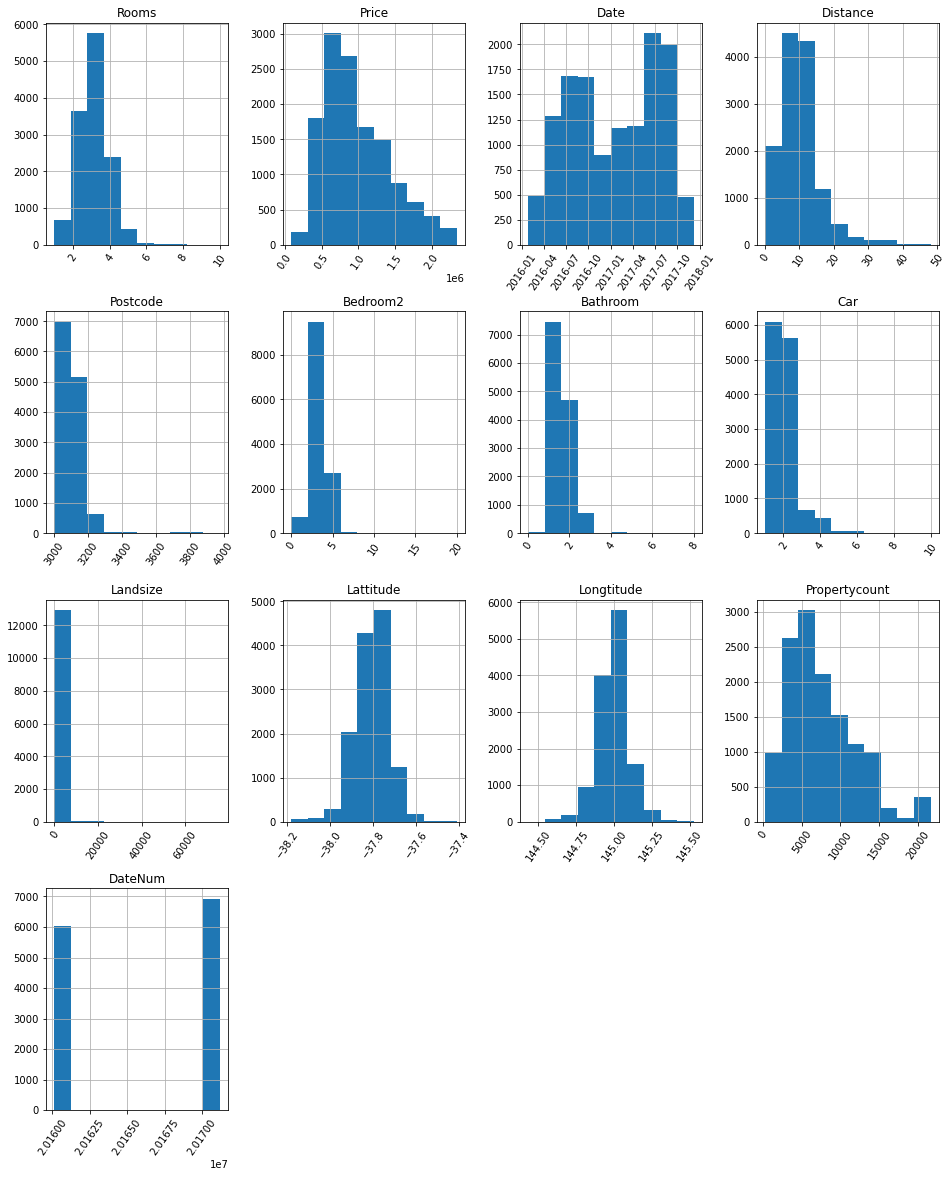

In [23]:
df_house.hist(figsize=(16,20), xrot=55)
plt.show()

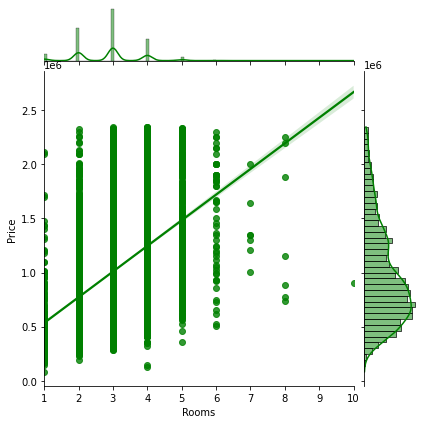

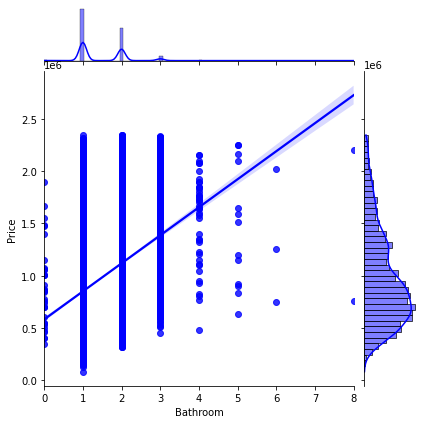

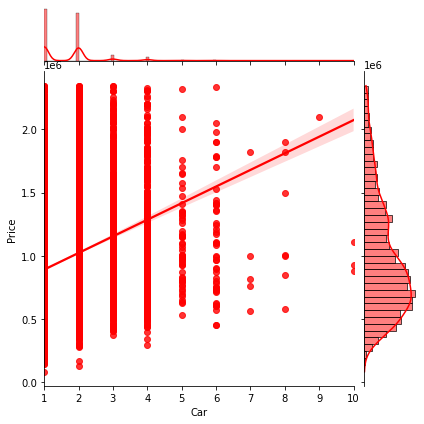

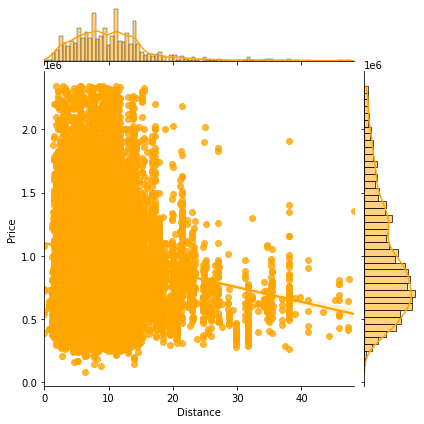

In [100]:
sns.jointplot('Rooms', 'Price', data=df_house, kind='reg', color='g')
sns.jointplot('Bathroom', 'Price', data=df_house, kind='reg', color='b')
sns.jointplot('Car', 'Price', data=df_house, kind='reg', color='r')
sns.jointplot('Distance', 'Price', data=df_house, kind='reg', color='orange')

no typical linear relationships between the numberic attributes and price shown. 

In [ ]:
sns.jointplot(x="Rooms", y="Price", data=df_e ,kind = 'reg')
plt.show()


fig, ax = plt.subplots(1,2, figsize=(12, 5))
p1 = sns.countplot(x=df_house.Rooms,palette='Blues', ax=ax[0]);
p1.set_title("Count of properties sold with different number of rooms")
p1.set_ylabel("Count")
p1.set_xlabel("No. of rooms")
p2 = sns.countplot(x=df_house.Car,palette='Greens', ax=ax[1]);
p2.set_title("Count of properties sold with different number of carspots")
p2.set_ylabel("Count")
p2.set_xlabel("No. of carspots")
fig.show()

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

Text(0.5, 1.0, 'Regionname VS Price')

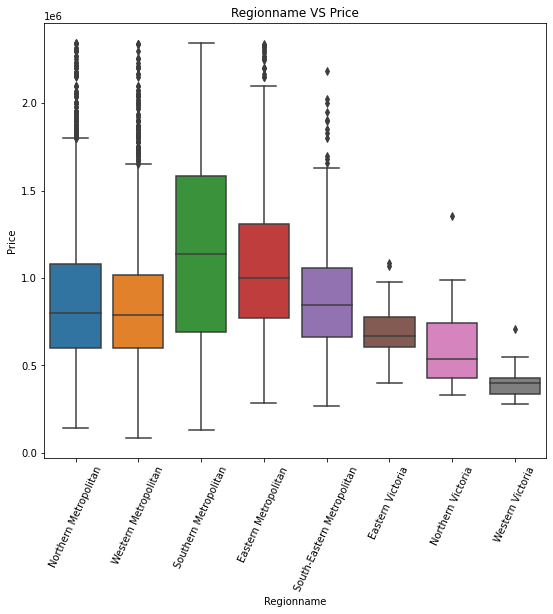

In [24]:
fig, axs = plt.subplots(figsize=(9,8))
sns.boxplot(x='Regionname',y='Price', data = df_house)
plt.xticks(rotation = 65)
plt.title("Regionname VS Price")

<Figure size 648x576 with 0 Axes>

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

Text(0.5, 1.0, 'Violin plot for Regionname to Price')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

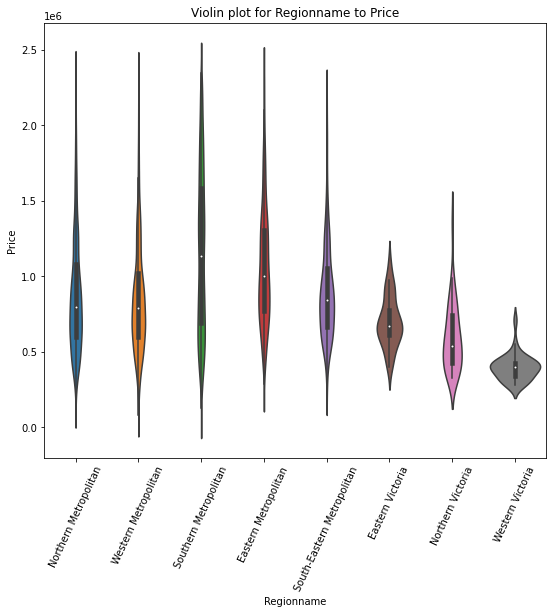

In [25]:
plt.figure(figsize=(9,8), facecolor='w', edgecolor='k')
sns.violinplot(df_house['Regionname'], df_house['Price'])
plt.title("Violin plot for Regionname to Price")
plt.xticks(rotation=65)

<AxesSubplot:xlabel='Type', ylabel='Price'>

Text(0.5, 1.0, 'Type VS Price')

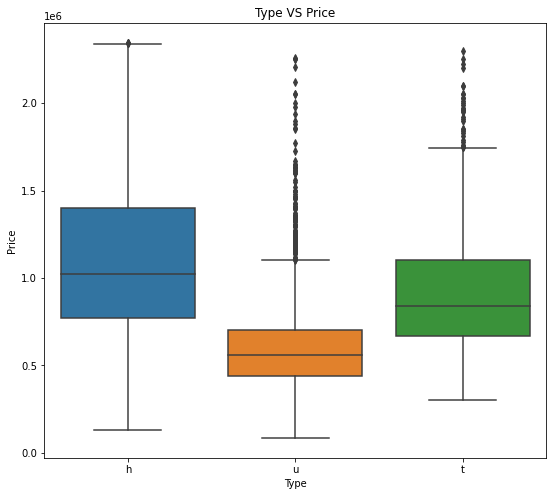

In [26]:
fig, axs = plt.subplots(figsize=(9,8))
sns.boxplot(data = df_house, x = 'Type', y = 'Price')
plt.title("Type VS Price")

<AxesSubplot:xlabel='Method', ylabel='Price'>

Text(0.5, 1.0, 'Method VS Price')

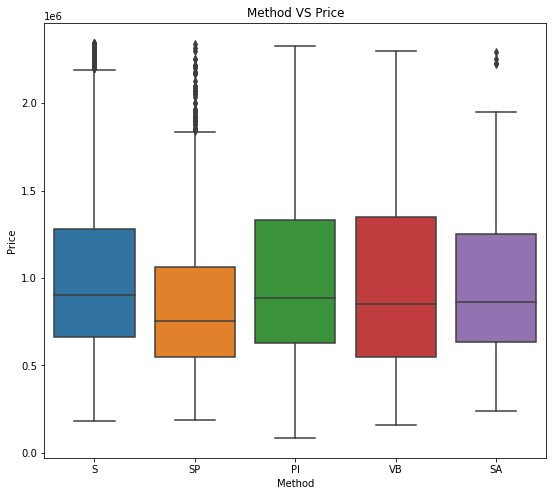

In [27]:
fig, axs = plt.subplots(figsize=(9,8))
sns.boxplot(data = df_house, x = 'Method', y = 'Price')
plt.title("Method VS Price")

In [47]:
# Price distributions for each region

# plt.clf()
# plt.grid(False)
# color=iter(cm.rainbow(np.linspace(0,1,len(group_region))))
# for k in range(len(group_region)):
#   plt.clf()
#   c = next(color)
#   plt.hist(group_region[k][1]['Price'].dropna(),color=c,bins = 100)
#   plt.title("Price of properties in the " +  group_region[k][0] + " area")
#   plt.xlabel("Price")
#   plt.ylabel("Count")
#   plt.show()
  

<AxesSubplot:title={'center':'Average property prices in different regions'}, xlabel='Regionname'>

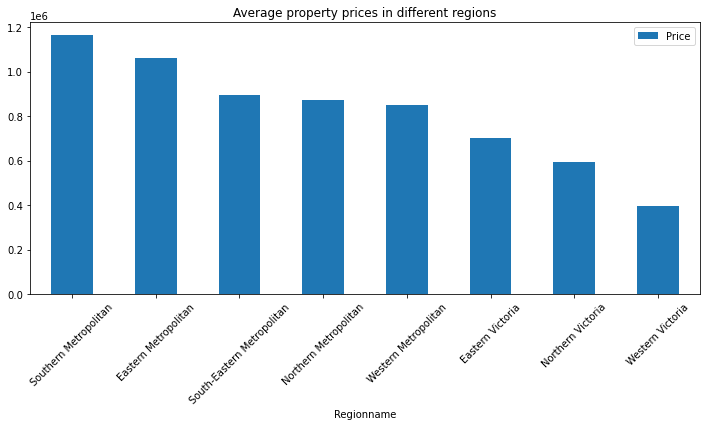

In [34]:
#average property price in each region
df_house[['Regionname','Price']].groupby('Regionname').mean().sort_values(by='Price', 
                                                                    ascending=False).plot.bar(figsize=(12,5), rot=45, 
                                                                                              title='Average property prices in different regions')

<AxesSubplot:title={'center':'Average property prices with different number of rooms'}, xlabel='Rooms'>

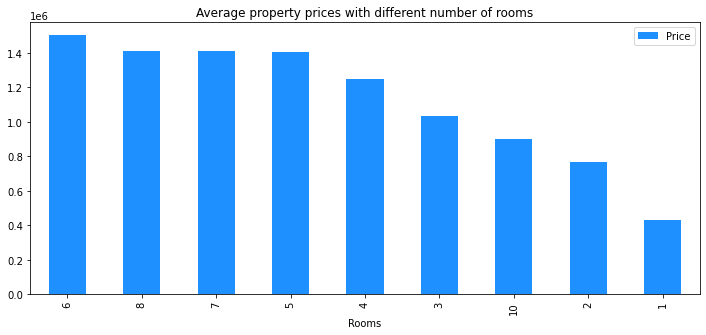

In [40]:
#average property price in each region
df_house[['Rooms','Price']].groupby('Rooms').mean().sort_values(by='Price', 
                                                                    ascending=False).plot.bar(figsize=(12,5), color = 'dodgerblue',
                                                                                              title='Average property prices with different number of rooms')

<AxesSubplot:title={'center':'Average property prices in top 20 suburbs'}, xlabel='Suburb'>

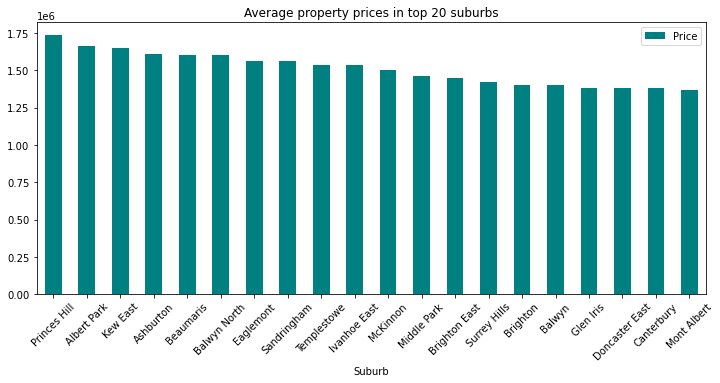

In [35]:
df_house[['Suburb','Price']].groupby('Suburb').mean().sort_values(by='Price', 
                                                                    ascending=False)[0:20].plot.bar(figsize=(12,5), rot=45, color='teal',
                                                                                              title='Average property prices in top 20 suburbs')

<AxesSubplot:title={'center':'Average property prices in the cheapest 20 suburbs'}, xlabel='Suburb'>

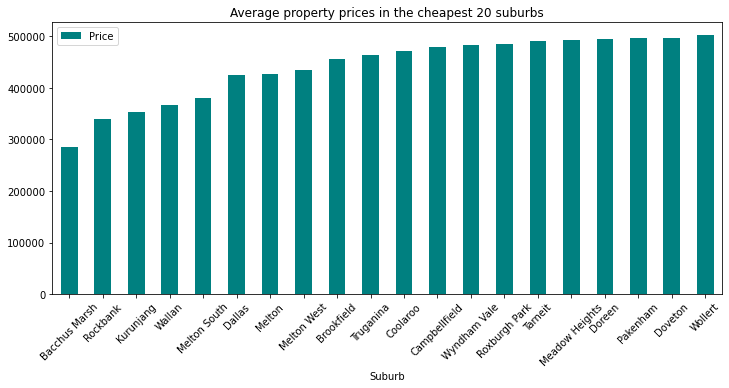

In [33]:
df_house[['Suburb','Price']].groupby('Suburb').mean().sort_values(by='Price', 
                                                                    ascending=True)[0:20].plot.bar(figsize=(12,5), rot=45, color='teal',
                                                                                              title='Average property prices in the cheapest 20 suburbs')

<AxesSubplot:xlabel='Type', ylabel='count'>

Text(0.5, 1.0, 'Types of properties sold in Melbourne')

Text(0.5, 0, 'Property Type ')

Text(0, 0.5, 'Count')

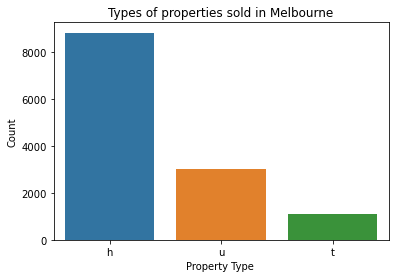

([<matplotlib.patches.Wedge at 0x1be05d531c0>,
 [Text(0.6094512045223879, -0.9456184374821649, 'h'),
  Text(-0.3378746543664215, 1.073063706373844, 'u'),
  Text(-1.0850016969822427, 0.297315182164742, 't')],
 [Text(0.33858400251243764, -0.5253435763789804, '68.2%'),
  Text(-0.18770814131467858, 0.5961465035410244, '23.3%'),
  Text(-0.6027787205456904, 0.16517510120263443, '8.5%')])

Text(0.5, 1.0, '% of types of properties sold')

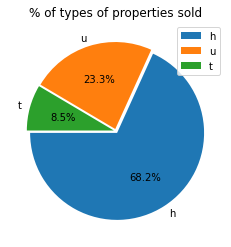

In [29]:
sns.countplot(df_house['Type'])
plt.title("Types of properties sold in Melbourne")
plt.xlabel("Property Type ")
plt.ylabel("Count")
plt.show()

plt.pie(x = df_house.Type.value_counts(),labels=df_house.Type.value_counts().index,
        startangle=180,autopct='%1.1f%%',explode=(0.025,0.025,0.025))
plt.title("% of types of properties sold")
plt.legend()

plt.show()

In [10]:
# overall geo distribution of sold properties in Melbourne
# px.scatter(df_house, x="Longtitude", y="Lattitude", color= 'Regionname')

(array([  2.,  15.,  60., 194., 385., 630., 737., 785., 813., 746., 543.,
        444., 573., 572., 443., 344., 263., 285., 235., 213., 137., 132.,
        109., 102.,  77.,  93.,  63.,  58.,  44.,  34.,  54.,  31.,  33.,
         17.,  25.,  21.,  18.,   9.,   9.,   9.,  12.,   9.,   6.,  12.,
          6.,   3.,   5.,   3.,   1.,   4.,   0.,   3.,   5.,   2.,   0.,
          4.,   2.,   1.,   0.,   0.,   5.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 131000.,  219690.,  308380.,  397070.,  485760.,  574450.,
         663140.,  751830.,  840520.,  929210., 1017900., 1106590.,
        1195280., 1283970., 1372660., 1461350., 1550040., 1638730.,
        1727420., 1816110., 1904800., 1993490., 2082180., 2170870.,
        2259560., 2348250., 2436940., 2525630.

Text(0.5, 1.0, 'Price of properties of type h')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

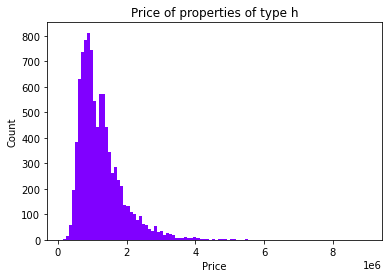

(array([ 3.,  9.,  8., 19., 13., 22., 36., 24., 28., 43., 39., 54., 46.,
        35., 55., 52., 56., 54., 42., 34., 50., 33., 33., 26., 10., 25.,
        13., 15., 26., 25., 12., 16., 11., 14., 16., 10., 10.,  7.,  7.,
         6.,  8.,  8.,  4.,  4.,  7.,  6.,  3.,  1.,  4.,  0.,  3.,  1.,
         4.,  3.,  2.,  2.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 300000.,  331750.,  363500.,  395250.,  427000.,  458750.,
         490500.,  522250.,  554000.,  585750.,  617500.,  649250.,
         681000.,  712750.,  744500.,  776250.,  808000.,  839750.,
         871500.,  903250.,  935000.,  966750.,  998500., 1030250.,
        1062000., 1093750., 1125500., 1157250., 1189000., 1220750.,
        1252500., 1284250., 1316000., 1347750., 1379500., 1411250.,
        1443000., 1474750.

Text(0.5, 1.0, 'Price of properties of type t')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

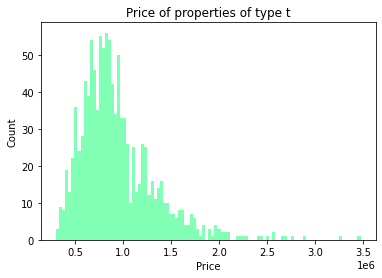

(array([  1.,   1.,   6.,  12.,  33.,  69., 122., 126., 192., 190., 249.,
        218., 207., 200., 211., 183., 152., 143., 112.,  87., 107.,  72.,
         54.,  46.,  24.,  26.,  17.,  13.,  22.,   3.,  12.,  10.,  16.,
          5.,   9.,  10.,   4.,  10.,   3.,   6.,   1.,   2.,   3.,   6.,
          3.,   0.,   1.,   1.,   0.,   1.,   2.,   1.,   1.,   1.,   1.,
          2.,   0.,   1.,   0.,   1.,   0.,   3.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  85000.,  120400.,  155800.,  191200.,  226600.,  262000.,
         297400.,  332800.,  368200.,  403600.,  439000.,  474400.,
         509800.,  545200.,  580600.,  616000.,  651400.,  686800.,
         722200.,  757600.,  793000.,  828400.,  863800.,  899200.,
         934600.,  970000., 1005400., 1040800.

Text(0.5, 1.0, 'Price of properties of type u')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

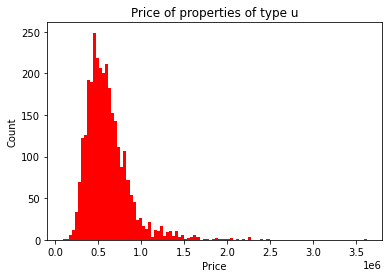

In [56]:
# price distribution of each property type (hourse, townhouse, unit) 

group_type = np.asarray(df_house.groupby(by = "Type"))
plt.clf()
plt.grid(False)
color=iter(cm.rainbow(np.linspace(0,1,len(group_type))))
for k in range(len(group_type)):
    plt.clf()
    c = next(color)
    plt.hist(group_type[k][1]['Price'].dropna(),color=c,bins = 100)
    plt.title("Price of properties of type " +  group_type[k][0])
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.show()

Text(0.5, 1.0, 'Count of properties sold with different number of rooms')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'No. of rooms')

Text(0.5, 1.0, 'Count of properties sold with different number of carspots')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'No. of carspots')

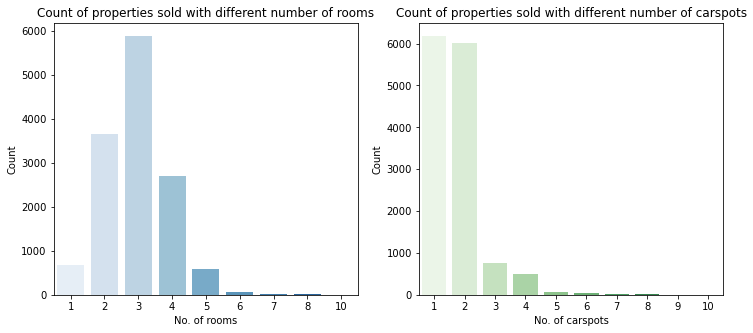

In [61]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
p1 = sns.countplot(x=df_house.Rooms,palette='Blues', ax=ax[0]);
p1.set_title("Count of properties sold with different number of rooms")
p1.set_ylabel("Count")
p1.set_xlabel("No. of rooms")
p2 = sns.countplot(x=df_house.Car,palette='Greens', ax=ax[1]);
p2.set_title("Count of properties sold with different number of carspots")
p2.set_ylabel("Count")
p2.set_xlabel("No. of carspots")
fig.show()

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Distance', ylabel='Price'>

Text(0.5, 1.0, 'Property prices based on distances from City Center')

Text(0.5, 0, 'Distance from CBD')

Text(0, 0.5, 'Price in AUD')

<AxesSubplot:>

<AxesSubplot:xlabel='Distance', ylabel='Count'>

Text(0.5, 1.0, 'Counts of properties sold based On Distance from City Center')

Text(0.5, 0, 'Distance from CBD')

Text(0, 0.5, 'Count')

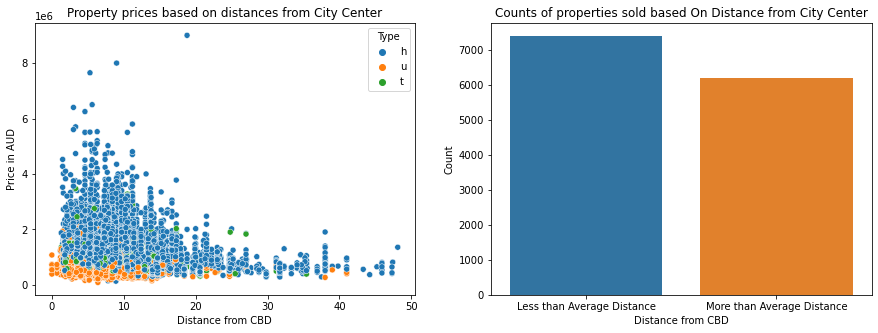

In [62]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x=df_house.Distance,y=df_house.Price,hue=df_house.Type);
plt.title("Property prices based on distances from City Center")
plt.xlabel("Distance from CBD")
plt.ylabel("Price in AUD")

plt.subplot(1,2,2)
dist_mean = df_house.Distance.mean()
dist_less = df_house[df_house["Distance"] < dist_mean].shape[0]
dist_more= df_house[df_house["Distance"] > dist_mean].shape[0]
distance_df = pd.DataFrame({"Distance":["Less than Average Distance","More than Average Distance"], 
                            "Count":[dist_less,dist_more]})
sns.barplot(x=distance_df.Distance, y=distance_df.Count)
plt.title('Counts of properties sold based On Distance from City Center')        
plt.xlabel('Distance from CBD')
plt.ylabel('Count')
plt.show()

<AxesSubplot:title={'center':'average_price of properties sold by top 20 agents'}, xlabel='SellerG'>

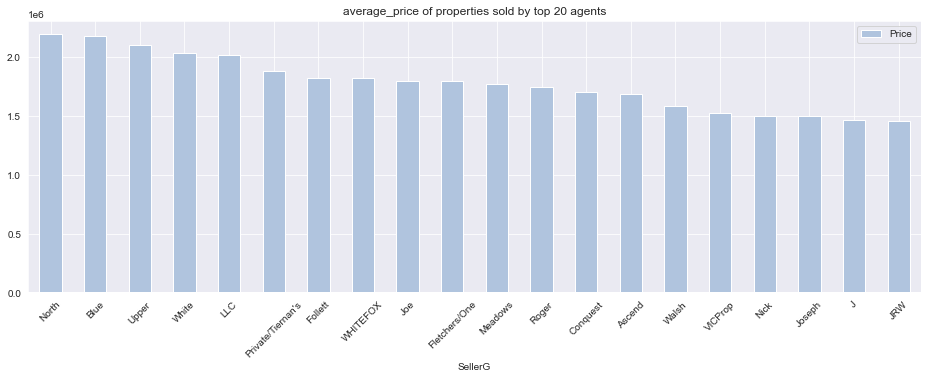

In [58]:
df_house[['SellerG','Price']].groupby('SellerG').mean().sort_values(by='Price', 
                                                                    ascending=False)[0:20].plot.bar(figsize=(16,5), rot=45, color='lightsteelblue',
                                                                                              title='average_price of properties sold by top 20 agents')

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

Text(0.5, 1.0, 'geo distribution of properties with Price and Landsize')

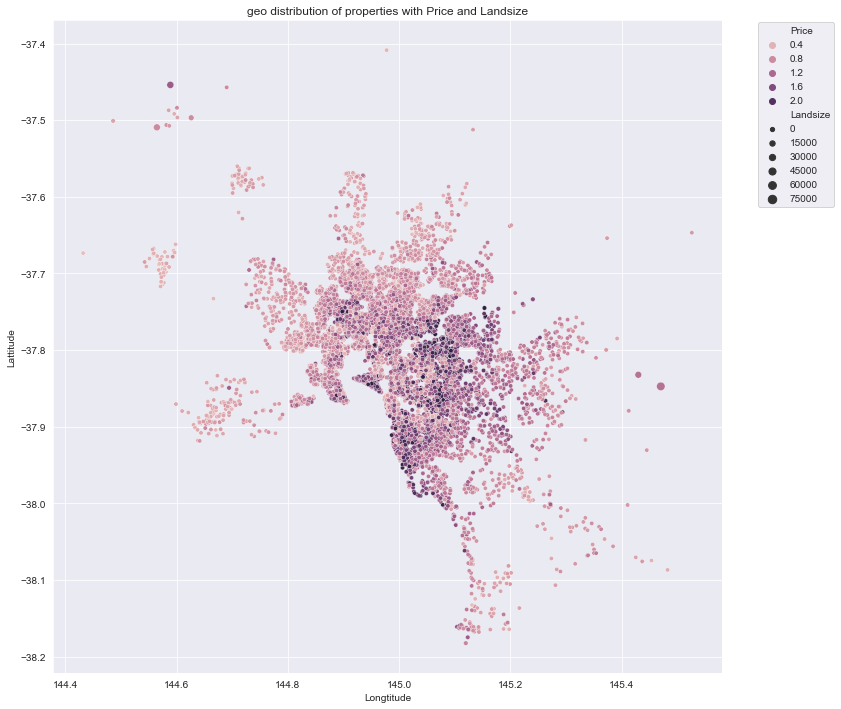

In [63]:
#geo distribution
plt.figure(figsize=(12,12))
sns.scatterplot(df_house["Longtitude"], df_house["Lattitude"], hue=df_house["Price"], size=df_house["Landsize"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("geo distribution of properties with Price and Landsize")

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

Text(0.5, 1.0, 'geo distribution of different types of properties')

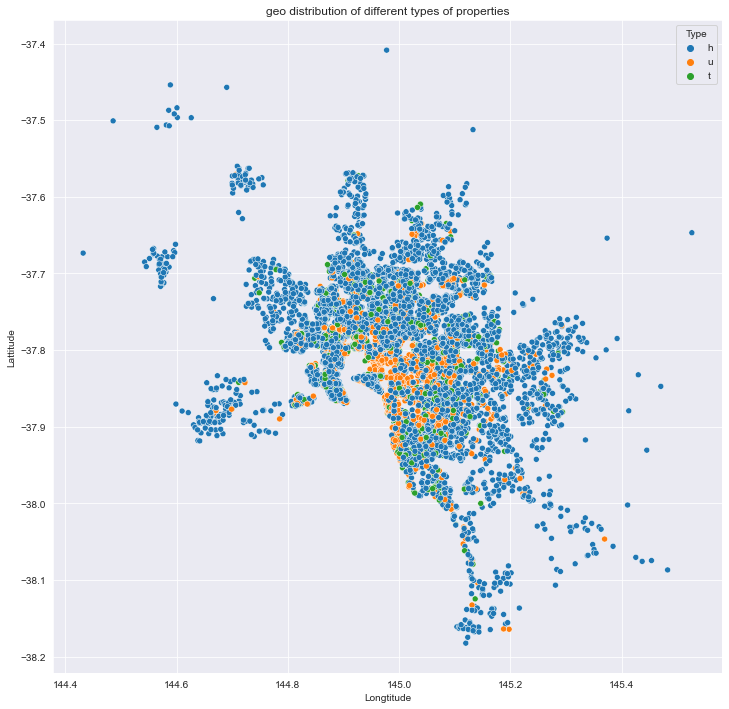

In [66]:
plt.figure(figsize=(12,12), facecolor='w', edgecolor='k')
sns.scatterplot(df_house["Longtitude"], df_house["Lattitude"], hue=df_house["Type"])
plt.title("geo distribution of different types of properties")

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

Text(0.5, 1.0, 'geo distribution of properties in regions')

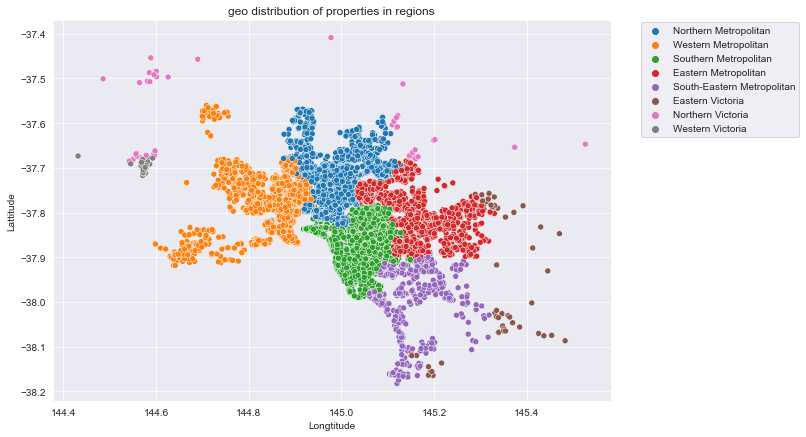

In [67]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(df_house["Longtitude"], df_house["Lattitude"], hue=df_house["Regionname"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("geo distribution of properties in regions")


,Suburb,Propertycount
0,Abbotsford,[4019]
1,Aberfeldie,[1543]
2,Airport West,[3464]
3,Albanvale,[1899]
4,Albert Park,[3280]
5,Albion,[2185]
6,Alphington,[2211]
7,Altona,[5301]
8,Altona Meadows,[7630]
9,Altona North,[5132]


([<matplotlib.patches.Wedge at 0x1998fe23e50>,
 [Text(1.0354163618997623, 0.371366338687637, 'Abbotsford'),
  Text(0.7496726124091179, 0.8049788656875959, 'Aberfeldie'),
  Text(0.34686730798228316, 1.0438788582269134, 'Airport West'),
  Text(-0.15210926192417124, 1.0894323165928592, 'Albanvale'),
  Text(-0.6051188613980379, 0.9186028323385151, 'Albert Park'),
  Text(-0.9545854952051686, 0.5465954009538528, 'Albion'),
  Text(-1.0887168349192902, 0.15714850735315006, 'Alphington'),
  Text(-0.9651716423979299, -0.5276776484852118, 'Altona'),
  Text(0.04127377777622548, -1.099225397845264, 'Altona Meadows'),
  Text(0.9953482544468557, -0.4682754022683635, 'Altona North')],
 [Text(0.5647725610362339, 0.2025634574659838, '11.0%'),
  Text(0.408912334041337, 0.4390793812841432, '4.2%'),
  Text(0.18920034980851805, 0.5693884681237709, '9.4%'),
  Text(-0.08296868832227522, 0.5942358090506504, '5.2%'),
  Text(-0.33006483348983884, 0.5010560903664628, '8.9%'),
  Text(-0.5206829973846373, 0.2981429

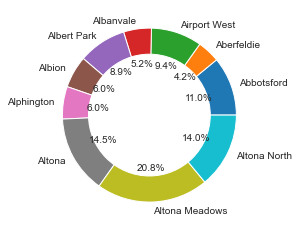

In [68]:
property_count_df = df_house.groupby("Suburb")["Propertycount"].unique().head(10).to_frame().reset_index()
my_circle=plt.Circle( (0,0), 0.7, color='white')
display(property_count_df)

plt.pie(property_count_df["Propertycount"], labels=property_count_df["Suburb"], autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

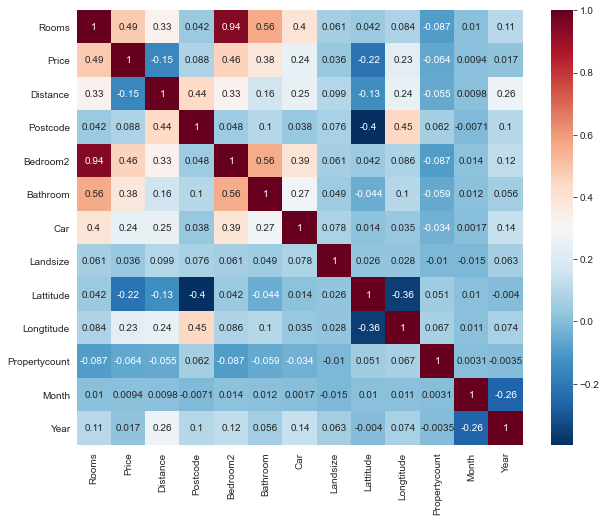

In [71]:
#correlation of the numeric attributes
corrs = df_house.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

`rooms` and `bedrooms2` have 0.94 correlation; "Bedrooms2" will not be used in model building. 

## feature encoding 


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

In [58]:
df_e = df_house.copy()

In [59]:
# use "label encoding" for "Method","SellerG","CouncilArea1", "regionname"
# use "one-hot encoding" for "type"

cat_features1 = ['Suburb','Method', 'SellerG','CouncilArea1', 'Regionname']


In [60]:
# encoding cat_1
for column in cat_features1:
    
    label_encoder = LabelEncoder()
    
    df_e[column] = label_encoder.fit_transform(df_e[column])

In [61]:
# one hot encoding for "Type"
house_type = pd.get_dummies(df_e['Type'], drop_first=True)
df_e = pd.merge(df_e,house_type, left_index=True, right_index=True)
df_e.drop('Type', axis=1, inplace=True)

In [63]:
# normalization of "dateNum"， “longtitude", "lattitude"
to_norm = ['DateNum', 'Lattitude', 'Longtitude']

for feature in to_norm:
    df_e[feature] = (df_e[feature] - df_e[feature].min()) / (df_e[feature].max() - df_e[feature].min()) 


In [64]:
df_e.head(2)

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,CouncilArea1,Lattitude,Longtitude,Regionname,Propertycount,DateNum,t,u
0,0,85 Turner St,2,1480000,1,23,2016-03-12,2.5,3067,2,...,1,202,32,0.494755,0.517651,2,4019,0.016606,0,0
1,0,25 Bloomburg St,2,1035000,1,23,2016-04-02,2.5,3067,2,...,1,156,32,0.484031,0.513083,2,4019,0.024729,0,0


In [65]:
df_e.drop(['Address', 'Bedroom2','Date'], axis = 1, inplace = True)

In [66]:
X = df_e.drop('Price', axis=1)
Y = df_e['Price']

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12956 entries, 0 to 13579
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12956 non-null  int32  
 1   Rooms          12956 non-null  int64  
 2   Method         12956 non-null  int32  
 3   SellerG        12956 non-null  int32  
 4   Distance       12956 non-null  float64
 5   Postcode       12956 non-null  int64  
 6   Bathroom       12956 non-null  int64  
 7   Car            12956 non-null  int64  
 8   Landsize       12956 non-null  int64  
 9   CouncilArea1   12956 non-null  int32  
 10  Lattitude      12956 non-null  float64
 11  Longtitude     12956 non-null  float64
 12  Regionname     12956 non-null  int32  
 13  Propertycount  12956 non-null  int64  
 14  DateNum        12956 non-null  float64
 15  t              12956 non-null  uint8  
 16  u              12956 non-null  uint8  
dtypes: float64(4), int32(5), int64(6), uint8(2)
memory

## dataset spliting: training and testing

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest,chi2

In [73]:

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)

def Predictive_Model(estimator, train_X, train_y, test_X, test_y):
    estimator.fit(train_X, train_y)
    test_pred = estimator.predict (test_X)
    train_pred = estimator.predict(train_X)
    print ('Training set evaluation: \n ______________________________')
    print_evaluate(train_y, train_pred)
    print('=================================')
    print ('Test set evaluation: \n ______________________________')
    print_evaluate(test_y, test_pred)
    
    plt.figure(figsize=(10,5))
    sns.distplot(test_y, hist=True, kde=False)
    sns.distplot(test_pred, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.xlim(0,)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)
print("Total size: ", df_e.shape[0])
print("Train size: ", x_train.shape, y_train.shape)
print("Test size: ", x_test.shape, y_test.shape)

Total size:  12956
Train size:  (9069, 17) (9069,)
Test size:  (3887, 17) (3887,)


## basic models without feature selection

### 1. linear regression

Training set evaluation: 
 ______________________________
MAE: 210649.28143829785
MSE: 77233382396.14902
RMSE: 277908.9462326627
R2 Square: 0.6213795061468701
Test set evaluation: 
 ______________________________
MAE: 212142.30503626692
MSE: 78666264143.90764
RMSE: 280475.0686672661
R2 Square: 0.6212866051074637


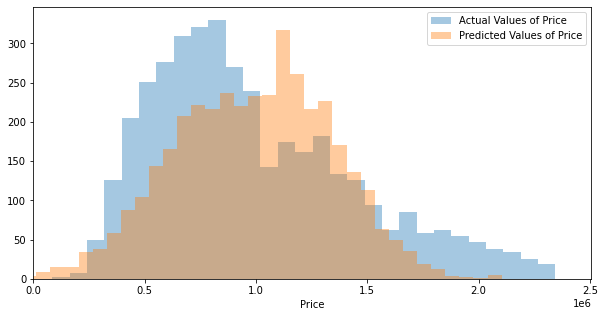

In [74]:
#linear regression as baseline
lr = LinearRegression()
Predictive_Model(lr, x_train, y_train, x_test, y_test)

In [81]:
coeff_lr = pd.DataFrame(lr.coef_,x_train.columns,columns=['Coefficient'])
print('Regression intercept is : w0={}'.format(lr.intercept_))  
#print('Regression coefficients: w1={}'.format(lr.coef_))
print('Regression coefficients are:\n')
coeff_lr

Regression intercept is : w0=-1524959.9734348967
Regression coefficients are:



,Coefficient
Suburb,-3.398799e+02
Rooms,1.464433e+05
Method,-9.259439e+03
SellerG,-1.493537e+02
Distance,-4.299277e+04
Postcode,7.516121e+02
Bathroom,9.655482e+04
Car,3.196983e+04
Landsize,1.321775e+01
CouncilArea1,-2.989680e+03


In [83]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(lr, X, Y, cv=5, scoring='r2')
scores_lr
scores_lr.mean()

array([0.64356786, 0.62740157, 0.64758481, 0.56859035, 0.5168769 ])

0.6008042970758828

Linear regression doesn't work well on the dataset: no typical linear relationships between Xs and Y;

In [ ]:

# # https://stackoverflow.com/questions/43613443/difference-between-cross-val-score-and-cross-val-predict
# from sklearn.model_selection import cross_val_predict

# cv_predicted = cross_val_predict(lr, X, Y, cv=5)


### 2. random forest

Training set evaluation: 
 ______________________________
MAE: 97231.10309587857
MSE: 15962676864.787952
RMSE: 126343.4876231773
R2 Square: 0.9217463173273466
Test set evaluation: 
 ______________________________
MAE: 142128.3935824444
MSE: 40180166621.147835
RMSE: 200449.91050421508
R2 Square: 0.8065655274972006


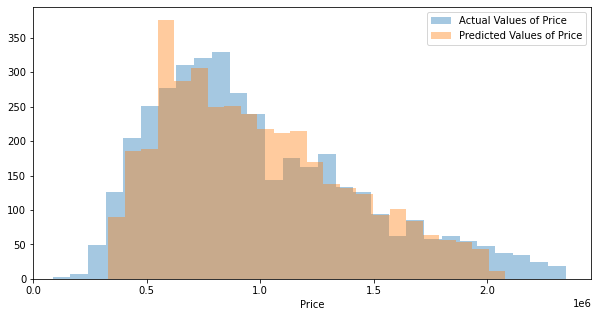

In [82]:
rf = RandomForestRegressor(max_leaf_nodes=500, random_state=1)
Predictive_Model(rf, x_train, y_train, x_test, y_test)

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [109]:
# Search optimal hyperparameter

n_estimators_range=[int(x) for x in np.linspace(start=50,stop=1500,num=30)]
max_features_range=['auto','sqrt']
max_depth_range=[int(x) for x in np.linspace(10,500,num=50)]
max_depth_range.append(None)
min_samples_split_range=[2,5,10]
min_samples_leaf_range=[1,2,4,8]
#bootstrap_range=[True,False]

random_forest_hp_range = {'n_estimators':n_estimators_range,
                        'max_features':max_features_range,
                        'max_depth':max_depth_range,
                        'min_samples_split':min_samples_split_range,
                        'min_samples_leaf':min_samples_leaf_range
                        # 'bootstrap':bootstrap_range
                        }
#random_forest_hp_range

In [112]:
RF_Model=RandomForestRegressor()
RF_model_test_random=RandomizedSearchCV(estimator=RF_Model,
                                        param_distributions=random_forest_hp_range,
                                        n_iter=20,
                                        n_jobs=-1,
                                        cv=3,
                                        verbose=1)
    
RF_model_test_random.fit(x_train,y_train)

best_hp_now=RF_model_test_random.best_params_
best_hp_now

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, 210, 220,
                                                      230, 240, 250, 260, 270,
                                                      280, 290, 300, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                 

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [114]:
# Grid Search

RF_hp_range_2={'n_estimators':[350,400,420],
                          'max_features':[4,5],
                          'max_depth':[35,40,42],
                          'min_samples_split':[2] # Greater than 1
                          # 'min_samples_leaf':[1,2]
                          }

RF_model_test_2_random=GridSearchCV(estimator=RF_Model,
                                    param_grid=RF_hp_range_2,
                                    cv=3,
                                    verbose=1,
                                    n_jobs=-1)

RF_model_test_2_random.fit(x_train, y_train)

best_hp_now_2 = RF_model_test_2_random.best_params_

best_hp_now_2

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [35, 40, 42], 'max_features': [4, 5],
                         'min_samples_split': [2],
                         'n_estimators': [350, 400, 420]},
             verbose=1)

{'max_depth': 35,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 420}

Training set evaluation: 
 ______________________________
MAE: 48202.96390138859
MSE: 4712149787.567158
RMSE: 68645.100244425
R2 Square: 0.976899671821604
Test set evaluation: 
 ______________________________
MAE: 135286.99062531054
MSE: 36878042650.08787
RMSE: 192036.5659193266
R2 Square: 0.8224625399337953


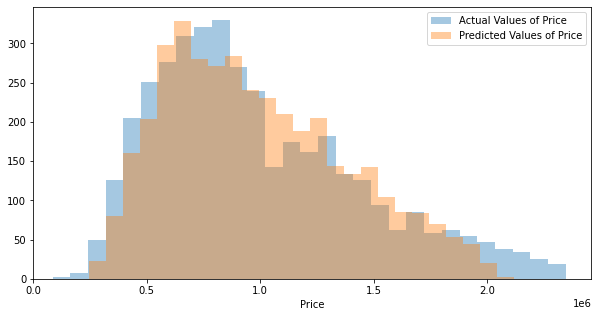

In [115]:
rf2 = RandomForestRegressor(n_estimators = 420, max_depth = 35, max_features = 5, min_samples_split = 2)
Predictive_Model(rf2, x_train, y_train, x_test, y_test)

to handle overfitting?

<AxesSubplot:>

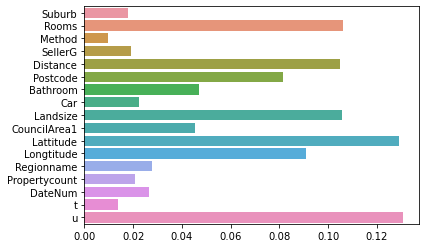

In [117]:
# Calculate the importance of variables

RF_feature_impot=rf2.feature_importances_

sns.barplot(x=RF_feature_impot, y=x_train.columns)


### 3. XGBOOST

Training set evaluation: 
 ______________________________
MAE: 73769.23640457878
MSE: 10552382797.421679
RMSE: 102724.79154236177
R2 Square: 0.9482691517303496
Test set evaluation: 
 ______________________________
MAE: 136837.91592568177
MSE: 37683641914.80789
RMSE: 194122.74960655152
R2 Square: 0.8185842417104687


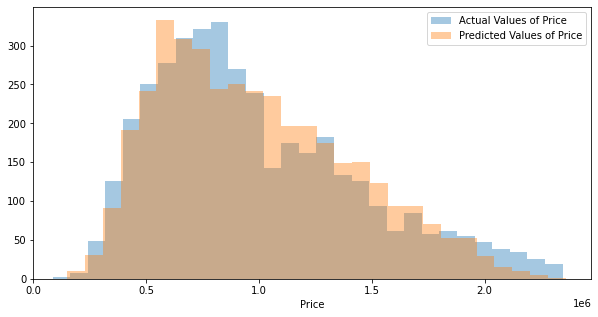

In [118]:
XGBR = XGBRegressor()
Predictive_Model(XGBR, x_train, y_train, x_test, y_test)

In [122]:
xgbr_model = XGBRegressor() 

params = {
    'n_estimators': [100, 120, 140, 160], 
    'learning_rate': [ 0.05, 0.075, 0.1],
    'max_depth': [5, 7],
    'reg_lambda': [0.3, 0.5],
    #'gamma': [0, 0.5]
}


xgb_reg = RandomizedSearchCV(xgbr_model, param_distributions=params, n_iter=10, cv=3, 
                             verbose=1, n_jobs=10, return_train_score=True)

xgb_reg.fit(x_train, y_train)

xgbr_model_pred = xgb_reg.predict(x_test)

mse = metrics.mean_squared_error(y_test, xgbr_model_pred)

r2 = metrics.r2_score(y_test, xgbr_model_pred)

print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
print("MSE :", mse)
print ("R_Squred:", r2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

Best score: 0.824
Best parameters set: {'reg_lambda': 0.5, 'n_estimators': 160, 'max_depth': 7, 'learning_rate': 0.075}
MSE : 35622549990.974556
R_Squred: 0.8285067050199325


Training set evaluation: 
 ______________________________
MAE: 77264.15418596317
MSE: 11682453606.530825
RMSE: 108085.39959925589
R2 Square: 0.9427292160890584
Test set evaluation: 
 ______________________________
MAE: 132272.31973967713
MSE: 35622549990.974556
RMSE: 188739.37053771943
R2 Square: 0.8285067050199325


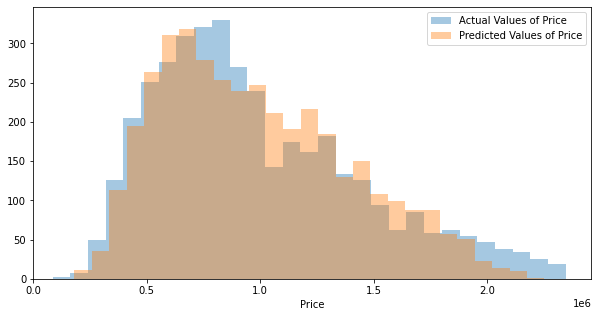

In [123]:
XGBR_op = XGBRegressor(reg_lambda = 0.5, n_estimators = 160, max_depth = 7, learning_rate = 0.075)
Predictive_Model(XGBR_op, x_train, y_train, x_test, y_test)

n_estimator, might be too small. How to decide the initial range of this parameter??

## models with feature selection 

### 1. RandomForest 

RFECV(estimator=RandomForestRegressor())

Optimal number of features : 17


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (nb of correct classifications)')

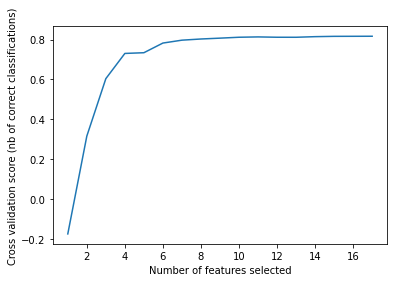

In [125]:
from sklearn.feature_selection import RFECV

# Instantiate RFECV visualizer with a random forest regressor
rfecv = RFECV(RandomForestRegressor())

rfecv.fit(x_train, y_train) # Fit the data to the visualizer

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [126]:
x_train_rf = rfecv.transform(x_train)
x_test_rf = rfecv.transform(x_test)

Training set evaluation: 
 ______________________________
MAE: 48310.47416758515
MSE: 4734668453.396033
RMSE: 68808.92713446442
R2 Square: 0.9767892787750673
Test set evaluation: 
 ______________________________
MAE: 135586.37170766803
MSE: 36876283264.4997
RMSE: 192031.9850038001
R2 Square: 0.8224710099291137


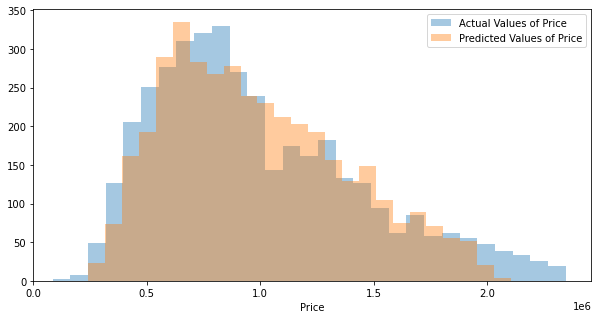

In [127]:
#random forest after feature engineer
# parameters not tuned yet, just use those in the previous tuning
Predictive_Model(rf2, x_train_rf, y_train, x_test_rf, y_test)

decreased, TBA

In [129]:
#XGBoost rfecv
# Instantiate RFECV visualizer with a XGBOOST
rfecv_xgb = RFECV(XGBRegressor())

rfecv_xgb.fit(x_train, y_train)


x_train_xgb = rfecv_xgb.transform(x_train)
x_test_xgb = rfecv_xgb.transform(x_test)

RFECV(estimator=XGBRegressor(base_score=None, booster=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, gamma=None, gpu_id=None,
                             importance_type='gain',
                             interaction_constraints=None, learning_rate=None,
                             max_delta_step=None, max_depth=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, n_estimators=100,
                             n_jobs=None, num_parallel_tree=None,
                             random_state=None, reg_alpha=None, reg_lambda=None,
                             scale_pos_weight=None, subsample=None,
                             tree_method=None, validate_parameters=None,
                             verbosity=None))

Training set evaluation: 
 ______________________________
MAE: 77264.15418596317
MSE: 11682453606.530825
RMSE: 108085.39959925589
R2 Square: 0.9427292160890584
Test set evaluation: 
 ______________________________
MAE: 132272.31973967713
MSE: 35622549990.974556
RMSE: 188739.37053771943
R2 Square: 0.8285067050199325


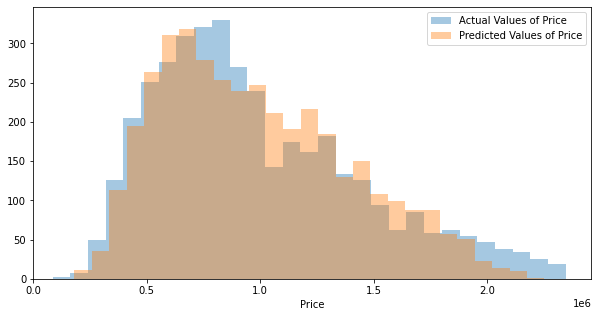

In [130]:
Predictive_Model(XGBR_op, x_train_xgb, y_train, x_test_xgb, y_test)